# Time Series Analysis of Golden State Warriors' 3 Point Shooting Distribution 1996-2017

In the recent years, the Golden State Warriors have been captivating fans across the world with their impeccable long distance shooting performance.

One of the most common statements of the NBA of today is that number of 3 pointers that are being taken have increased drastically over the years at the cost of reducing the number of mid-range shots i.e. the "Mid Range game is dead". I've web scraped their shooting data from 1996-2017 to quantify/visualize/verify that statement so let's get to it.


In [111]:
import requests
import csv
import json
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

DOWNLOAD_DELAY = 5

Importing all of the libraries we will need. The delay variable is there to palce delays between iterations of web scraping NBA's Stats website so I don't place a big load on their servers.

In [112]:
years_list = [x for x in range(1996,2018)]
for index,year in enumerate(years_list[:-1]):
    years_list[index] = str(year)+'-'+ str(years_list[index+1])[-2:]
years_list

['1996-97',
 '1997-98',
 '1998-99',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 2017]

These list of years is how the NBA Stats API maps each team's stats to any particular year. But wait that final value needs to be removed. That's a string the NBA Stats API won't recognize

In [113]:
years_list.pop();

In [114]:
years_dict = {}
dataframe_keys = ['overall_df', 'shot_5_ft_df', 'shot_8_ft_df', 'shot_area_df', 'assisted_shot_df', 'shot_type_df', 'assisted_by_df']
dataframe_keys

['overall_df',
 'shot_5_ft_df',
 'shot_8_ft_df',
 'shot_area_df',
 'assisted_shot_df',
 'shot_type_df',
 'assisted_by_df']

I will be storing the data in a dictionary of dictionaries. The outer dictionary will be the year and the inner dictionary will store the dataframes of each shooting stat type

In [115]:
for year in years_list:
    time.sleep(random.uniform(0,DOWNLOAD_DELAY))

    URL = 'http://stats.nba.com/stats/teamdashboardbyshootingsplits?' + \
    'DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&' + \
    'Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&' + \
    'PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlusMinus=N&Rank=N&' + \
    'Season=' + year + '&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&' + \
    'TeamID=1610612744&VsConference=&VsDivision='
    
    REQUEST_HEADERS = {
        'user-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:56.0) Gecko/20100101 Firefox/56.0',
        'From': 'rodellrodriguez53@gmail.com'
    }
    response = requests.get(URL, headers=REQUEST_HEADERS)
    response.raise_for_status()

    years_dict[year] = {}
    for index,(resultSets_dict,dataframe_name) in enumerate(zip(response.json()['resultSets'], dataframe_keys)):
        if dataframe_name not in years_dict[year]:
            years_dict[year][dataframe_name] =  pd.DataFrame(data=response.json()['resultSets'][index]['rowSet'], 
            columns=response.json()['resultSets'][index]['headers'])    

The outer for loop runs for every season between 1996-2017. So for each year we have to grab that team's respective shooting splits stats. Before grabbing each team's data I instill a delay of a random wait time between 0 and 5 seconds for courtesy and to not stress the NBA's production server. If you notice the way I am concatenating the URL strings, I concatenate the Season year based on the years_list I generated at the beginning. 

After grabbing the stats data, the inner for loop runs 7 times, each time updating the inner dictionary with a different shooting statline dataframe.

In [116]:
years_dict['1996-97']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,769,"Armstrong, B.J.",126,126,1.0,31,31,1.0,1.123,...,6,1,1,1,1,1,1,1,168,769
1,Assisted By,197,"Burrell, Scott",35,35,1.0,5,5,1.0,1.071,...,13,1,1,1,1,1,1,1,168,197
2,Assisted By,902,"Coles, Bimbo",149,149,1.0,34,34,1.0,1.114,...,7,1,1,1,1,1,1,1,168,902
3,Assisted By,692,"DeClercq, Andrew",32,32,1.0,10,10,1.0,1.156,...,3,1,1,1,1,1,1,1,168,692
4,Assisted By,957,"Fuller, Todd",24,24,1.0,8,8,1.0,1.167,...,2,1,1,1,1,1,1,1,168,957
5,Assisted By,923,"Marshall, Donyell",53,53,1.0,11,11,1.0,1.104,...,9,1,1,1,1,1,1,1,168,923
6,Assisted By,904,"Mullin, Chris",322,322,1.0,62,62,1.0,1.096,...,11,1,1,1,1,1,1,1,168,904
7,Assisted By,1077,"Owes, Ray",15,15,1.0,6,6,1.0,1.200,...,1,1,1,1,1,1,1,1,168,1077
8,Assisted By,899,"Price, Mark",342,342,1.0,48,48,1.0,1.070,...,14,1,1,1,1,1,1,1,168,899
9,Assisted By,691,"Roe, Lou",6,6,1.0,1,1,1.0,1.083,...,12,1,1,1,1,1,1,1,168,691


In [117]:
years_dict['2016-17']['assisted_by_df']

,GROUP_SET,PLAYER_ID,PLAYER_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Assisted By,2440,"Barnes, Matt",45,45,1.0,13,13,1.0,1.144,...,14,1,1,1,1,1,1,1,168,2440
1,Assisted By,203546,"Clark, Ian",90,90,1.0,27,27,1.0,1.150,...,12,1,1,1,1,1,1,1,168,203546
2,Assisted By,201939,"Curry, Stephen",524,524,1.0,163,163,1.0,1.156,...,11,1,1,1,1,1,1,1,168,201939
3,Assisted By,201142,"Durant, Kevin",300,300,1.0,130,130,1.0,1.217,...,3,1,1,1,1,1,1,1,168,201142
4,Assisted By,203110,"Green, Draymond",533,533,1.0,182,182,1.0,1.171,...,7,1,1,1,1,1,1,1,168,203110
5,Assisted By,2738,"Iguodala, Andre",261,261,1.0,85,85,1.0,1.163,...,9,1,1,1,1,1,1,1,168,2738
6,Assisted By,2733,"Livingston, Shaun",139,139,1.0,41,41,1.0,1.147,...,13,1,1,1,1,1,1,1,168,2733
7,Assisted By,1626172,"Looney, Kevon",29,29,1.0,13,13,1.0,1.224,...,2,1,1,1,1,1,1,1,168,1626172
8,Assisted By,203949,"McAdoo, James Michael",18,18,1.0,6,6,1.0,1.167,...,8,1,1,1,1,1,1,1,168,203949
9,Assisted By,1627775,"McCaw, Patrick",77,77,1.0,30,30,1.0,1.195,...,6,1,1,1,1,1,1,1,168,1627775


It works!

In [118]:
years_dict['2016-17']['shot_area_df']

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Area,Restricted Area,1559,2328,0.670,0,0,0.000,0.670,219,...,1,7,1,3,4,5,4,4,173,Restricted Area
1,Shot Area,In The Paint (Non-RA),353,807,0.437,0,0,0.000,0.437,58,...,6,6,3,1,4,5,6,2,173,In The Paint (Non-RA)
2,Shot Area,Mid-Range,638,1443,0.442,0,0,0.000,0.442,19,...,5,5,2,2,4,5,5,3,173,Mid-Range
3,Shot Area,Left Corner 3,111,258,0.430,111,258,0.430,0.645,2,...,2,2,4,4,1,4,1,7,173,Left Corner 3
4,Shot Area,Right Corner 3,114,289,0.394,114,289,0.394,0.592,3,...,3,3,4,4,2,3,2,6,173,Right Corner 3
5,Shot Area,Above the Break 3,755,1983,0.381,755,1983,0.381,0.571,12,...,4,4,4,4,3,2,3,5,173,Above the Break 3
6,Shot Area,Backcourt,1,31,0.032,1,31,0.032,0.048,0,...,7,1,4,4,4,1,7,1,173,Backcourt


In [119]:
frames = []
for i, year in enumerate(years_list):
#Specifying the columns that are useful    
    frames.append(years_dict[year]['shot_area_df'][['GROUP_SET', 'GROUP_VALUE','FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','EFG_PCT']])
    frames[i]['Year'] = pd.Series(year, index=frames[i].index)
final_shot_area_df = pd.concat(frames, ignore_index=True)
final_shot_area_df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,Year
0,Shot Area,Restricted Area,1270,2198,0.578,0,1,0.000,0.578,1996-97
1,Shot Area,In The Paint (Non-RA),398,900,0.442,0,0,0.000,0.442,1996-97
2,Shot Area,Mid-Range,1127,2854,0.395,280,748,0.374,0.444,1996-97
3,Shot Area,Left Corner 3,27,74,0.365,27,74,0.365,0.547,1996-97
4,Shot Area,Right Corner 3,33,77,0.429,33,77,0.429,0.643,1996-97
5,Shot Area,Above the Break 3,141,459,0.307,141,459,0.307,0.461,1996-97
6,Shot Area,Backcourt,0,4,0.000,0,4,0.000,0.000,1996-97
7,Shot Area,Restricted Area,1167,1974,0.591,0,0,0.000,0.591,1997-98
8,Shot Area,In The Paint (Non-RA),355,1152,0.308,0,0,0.000,0.308,1997-98
9,Shot Area,Mid-Range,1133,3060,0.370,0,0,0.000,0.370,1997-98


I placed all of the Shot Area dataframes in one dataframe (they were originally seperated by year) but before I did that I inserted an extra column called 'Year' so I can distinguish which stat is coming from which year. This will prove useful to do a time series glance at GSW's FGM.

In [120]:
above_the_break_3 = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Above the Break 3']
above_the_break_3

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,Year
5,Shot Area,Above the Break 3,141,459,0.307,141,459,0.307,0.461,1996-97
12,Shot Area,Above the Break 3,155,572,0.271,154,571,0.270,0.406,1997-98
19,Shot Area,Above the Break 3,117,421,0.278,117,421,0.278,0.417,1998-99
26,Shot Area,Above the Break 3,257,834,0.308,257,834,0.308,0.462,1999-00
33,Shot Area,Above the Break 3,217,755,0.287,217,755,0.287,0.431,2000-01
40,Shot Area,Above the Break 3,250,783,0.319,250,783,0.319,0.479,2001-02
47,Shot Area,Above the Break 3,333,951,0.350,332,950,0.349,0.525,2002-03
54,Shot Area,Above the Break 3,308,933,0.330,308,933,0.330,0.495,2003-04
61,Shot Area,Above the Break 3,466,1317,0.354,465,1316,0.353,0.530,2004-05
68,Shot Area,Above the Break 3,434,1303,0.333,434,1303,0.333,0.500,2005-06


Above the Break 3 is right at the top of the 3 point line. If you visualize a point guard bringing the ball up the court and stopping by the middle of the 3 point line, that's the above the break area.

<IPython.core.display.Javascript object>


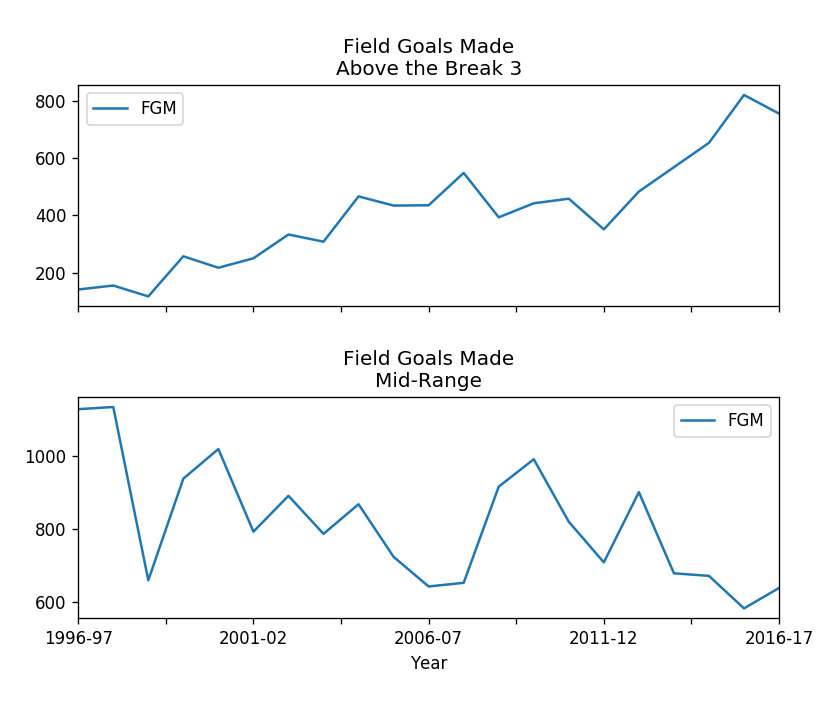

In [121]:
mid_range = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Mid-Range']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
above_the_break_3.plot.line(x='Year',y='FGM', title='Field Goals Made\nAbove the Break 3', ax=ax1)
mid_range.plot.line(x='Year',y='FGM', title='Field Goals Made\nMid-Range', ax=ax2)

plt.tight_layout()

I purposely did not set the same y-axis for both graphs so we can see the patterns more clearly.

So while the number of made Above the Break 3 pointers have steadily increased from 1996-2017 and taken a sharp increase from 2011-2017, the number of made Mid-Range shots shows patterns of decreasing but it's not decreasing nearly as fast as Above the Break 3's increasing pattern. As a matter of fact the last 4 seasons for FGM made for Mid Range show similar numbers between the years 2006-2008. 

2011 was the turning point in Top of the Break 3's when GSW drafted Klay Thompson followed by Draymond Green, Ezeli, and Barnes in 2012's draft.

The last 4 years have shown awfully consistent numbers of low mid range output. In 2015-16, when GSW achieved the best regular season record of all time, the number of mid-range shots made is the lowest its ever been for GSW. The number of FGM in mid-range for that year is half of what it was in 1996. 

So will 2017-2018 look the same?

<IPython.core.display.Javascript object>


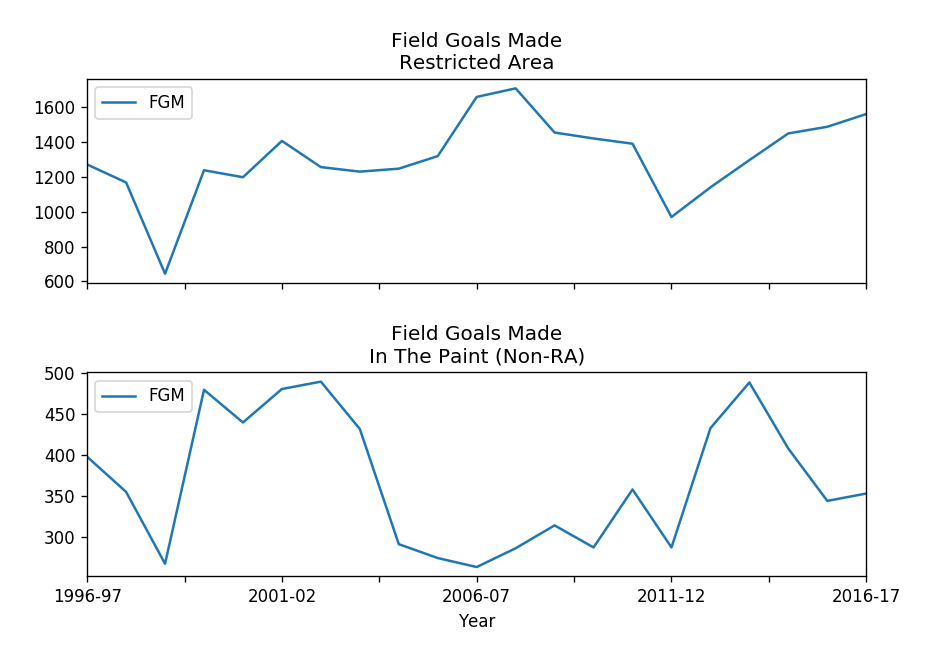

In [122]:
restricted_area = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'Restricted Area']
in_the_paint_non_ra = final_shot_area_df.loc[final_shot_area_df['GROUP_VALUE'] == 'In The Paint (Non-RA)']

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False)
restricted_area.plot.line(x='Year',y='FGM', title='Field Goals Made\nRestricted Area', ax=ax1)
in_the_paint_non_ra.plot.line(x='Year',y='FGM',  title='Field Goals Made\nIn The Paint (Non-RA)', ax=ax2)

plt.tight_layout()  

Visually the rate of increase in the FGM for the Restrictive Area hasn't enjoyed the same positive trend as the FGM for Above the Break 3's. However in 2011 both Restrivtive Area and Above the Break 3 FGM share identical positive linear trends. This sudden increase of FGM in both Above the Break 3's and Restrictive Area could be because of GSW's newly adopted outside-inside style of play. This style of play can be thought of as the polar opposite to the old school's inside-outside style of play. 

The outside-inside means you draw the defense out of the paint area by shooting from long distance aka 'the outside'. Because the defense is away from the paint and constantly worried about the outside shot, this opens up plenty of opportunities to attack close the basket aka 'the inside'. Inside-outside is flipped. Here, you stress giving the ball to the big man and hopes he can attract a double team so he can pass the ball out to the outside area for a 3 point shot. Historically, the league and coaches in general have advocated for an inside-outside type playstyle. Logically it makes sense to try to get as many shots as you can close to the rim because you are more likely make the shot in when you are close. The logic was that 3 point shots are too far and are unreliable to give you many points.


Note that we have only been looking at the Field Goals Made, maybe the number of Field Goals Attempted (FGA)  and also missed shots (FGA - FGM) in the the 4 areas of the court we just went over will provide more insight?

<IPython.core.display.Javascript object>


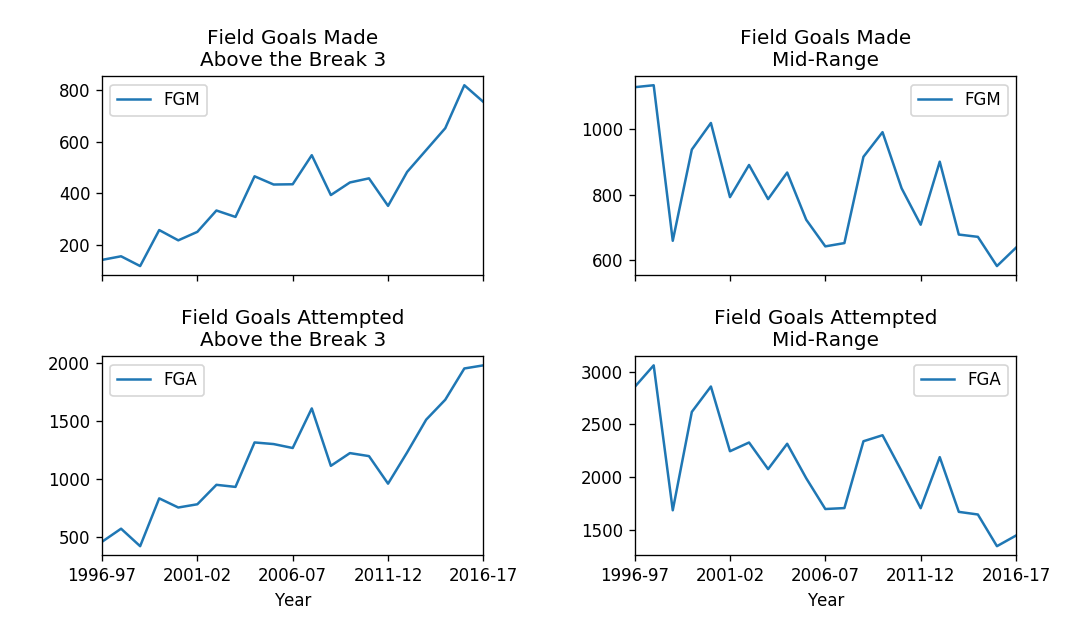

In [123]:
above_the_break_3_FGA = above_the_break_3[['FGA', 'Year']]
mid_range_FGA = mid_range[['FGA', 'Year']]

fig, axarr = plt.subplots(2, 2, sharex=True)
above_the_break_3.plot.line(x='Year',y='FGM', title='Field Goals Made\nAbove the Break 3', ax=axarr[0,0])
above_the_break_3_FGA.plot.line(x='Year',y='FGA', title='Field Goals Attempted\nAbove the Break 3', ax=axarr[1,0])
mid_range.plot.line(x='Year',y='FGM', title='Field Goals Made\nMid-Range', ax=axarr[0,1])
mid_range_FGA.plot.line(x='Year',y='FGA', title='Field Goals Attempted\nMid-Range', ax=axarr[1,1])

plt.tight_layout()

It appears that the attempts and made Field Goals are identical. The Above the 3 and Mid-Range still show an inverse relationship. The drop from 3000 mid-range shots attempted in 1996 to 1400 mid-range shot attempts in 2017 is high in magnitude(a difference of 1600) but in terms of percentage the drop(-50%) is not as dramatic as Golden State's above the break 3 FGA percentage increase from 500 to 2000(+300%!!!). The magnitude of the increase in above the break 3 FGA is roughly 1500 so it appears that nearly all of the mid-range shot attempts by the Warriros have been allocated to above the break 3 pointers.

It would seem that this abnormal percentage increase in Above the Break 3 point shot attempts is a heavy contributor to the idea that the mid-range game is fading away. But in my eyes there is a much more even distribution of shot attempts in various areas of the court now than in the past however it is a glaring trend that 3 pointers are being shot more than mid-range shots.

We have been looking at shooting numbers but what about if we take a look at the shooting percentages? Will that show us something different?

<IPython.core.display.Javascript object>


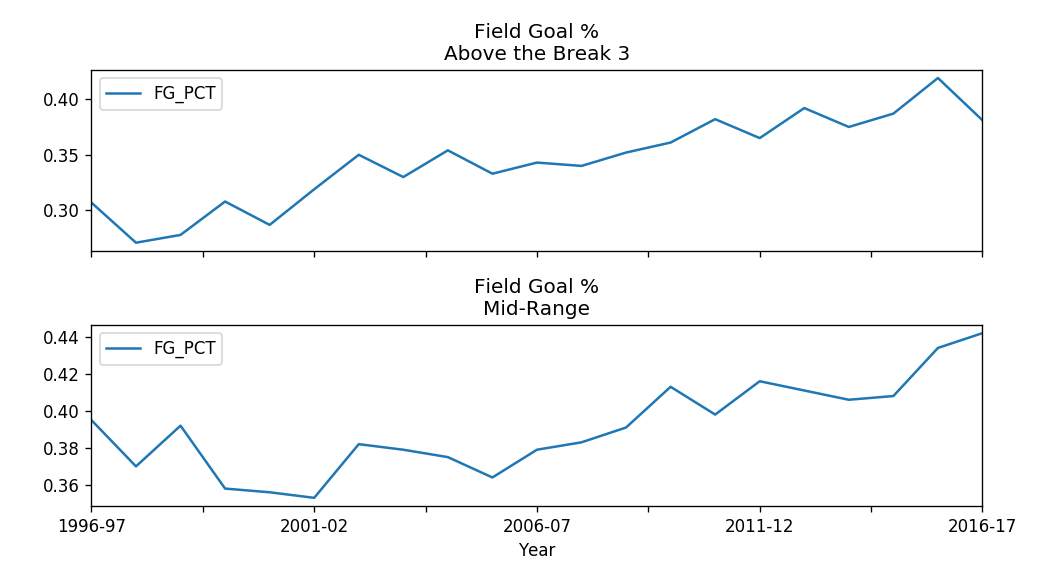

In [130]:
above_the_break_3_FG_Percentage = above_the_break_3[['FG_PCT', 'Year']]
mid_range_FG_Percentage = mid_range[['FG_PCT', 'Year']]

fig, axarr = plt.subplots(2,sharex=True)
above_the_break_3_FG_Percentage.plot.line(x='Year',y='FG_PCT', title='Field Goal %\nAbove the Break 3', ax=axarr[0])
mid_range_FG_Percentage.plot.line(x='Year',y='FG_PCT', title='Field Goal %\nMid-Range', ax=axarr[1])

plt.tight_layout()

So from 1996-2017, even though the Golden State Warriors have increased their number of Above the Break 3 pointer attempts by 300% while decreasing their mid-range shot attempts by 50% both categories have enjoyed positive trends in their respective Field Goal %. The upward trend of 3 pointer FG % is not surprising but the upward trend of the mid-range FG % is interesting. With their last year's mid-range FG % at 44%, the Warriors are the most efficient they've ever been at the mid-range game. 

So not only have the Warriors reduced their mid-range shot attempts over the years but simultaneously increased the effiency of those shots. I would think that any sensible coach would enjoy a great shooting percentage but lower attempts vs a high volume of missed shots. The Warriors have successfully allocated their mid-range shot attempts to 3 point shooting attempts while simulatenously not only MAINTAINING both areas's FG% but INCREASED them too which is  an amazing feat.


Finally, let's do a stacked bar chart of how the shot allocations have changed over the years.

In [230]:
shot_area_all_fga = final_shot_area_df[['GROUP_VALUE','FGA','Year']]
shot_area_all_fga


,GROUP_VALUE,FGA,Year
0,Restricted Area,2198,1996-97
1,In The Paint (Non-RA),900,1996-97
2,Mid-Range,2854,1996-97
3,Left Corner 3,74,1996-97
4,Right Corner 3,77,1996-97
5,Above the Break 3,459,1996-97
6,Backcourt,4,1996-97
7,Restricted Area,1974,1997-98
8,In The Paint (Non-RA),1152,1997-98
9,Mid-Range,3060,1997-98


In [231]:
shot_area_all_fga_pivot = shot_area_all_fga.pivot(index='Year', columns='GROUP_VALUE', values='FGA')
shot_area_all_fga_pivot

GROUP_VALUE,Above the Break 3,Backcourt,In The Paint (Non-RA),Left Corner 3,Mid-Range,Restricted Area,Right Corner 3
Year,,,,,,,
1996-97,459,4,900,74,2854,2198,77
1997-98,572,10,1152,61,3060,1974,54
1998-99,421,7,792,53,1683,1135,82
1999-00,834,5,1351,93,2618,2106,133
2000-01,755,8,1378,118,2859,1976,81
2001-02,783,15,1431,86,2244,2319,111
2002-03,951,11,1314,108,2327,2064,166
2003-04,933,17,1166,145,2074,1990,186
2004-05,1317,10,870,253,2315,2079,195


<IPython.core.display.Javascript object>


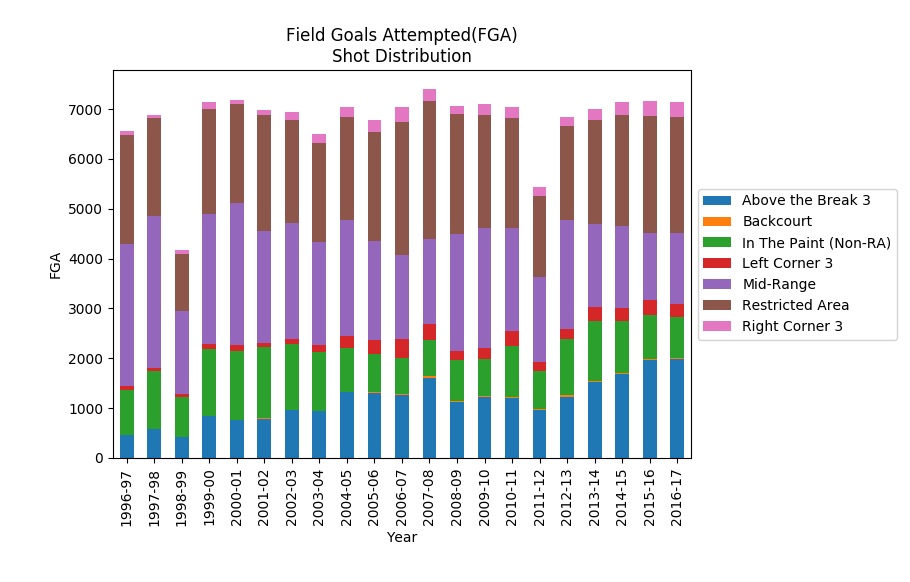

In [232]:
ax = shot_area_all_fga_pivot.plot.bar(stacked=True)
plt.ylabel('FGA')
plt.xlabel('Year')
plt.title('Field Goals Attempted(FGA)\nShot Distribution')
plt.tight_layout()

# Shrink current axis by 25% to allocate the 25% to the legend outside of the bar plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Let's consolidate all of the 3 point attempts into one category and remove the Backcourt shots to make better sense of this graph


In [233]:
shot_area_all_fga_pivot['3 Pointer'] =  shot_area_all_fga_pivot[['Above the Break 3', 'Left Corner 3'
                                                                 , 'Right Corner 3']].sum(axis=1)
shot_area_all_fga_pivot = shot_area_all_fga_pivot[['In The Paint (Non-RA)','Restricted Area','Mid-Range','3 Pointer',]]

<IPython.core.display.Javascript object>


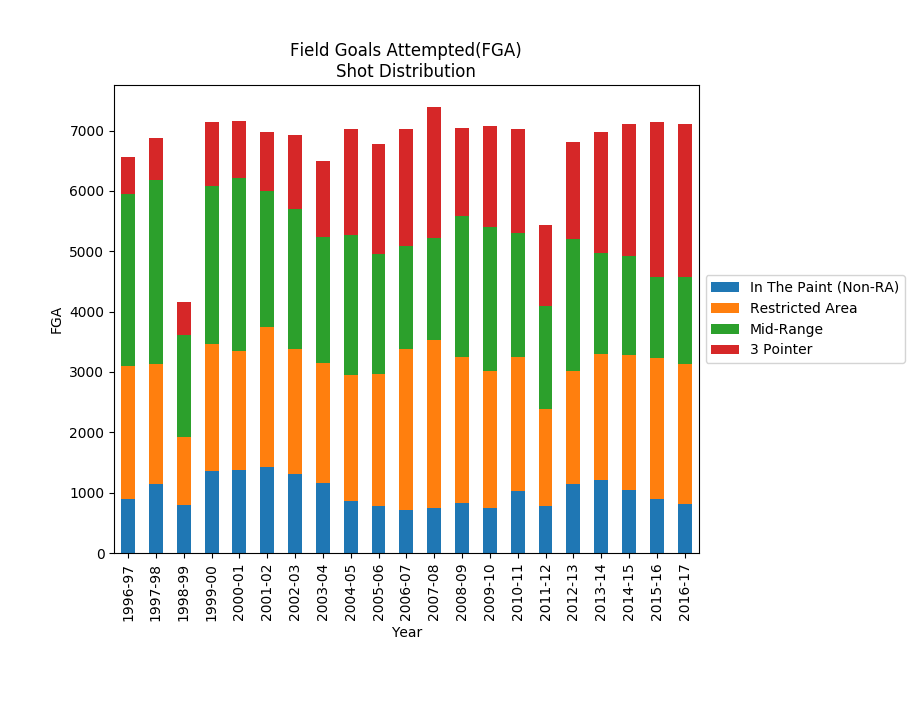

In [234]:
ax = shot_area_all_fga_pivot.plot.bar(stacked=True)
plt.ylabel('FGA')
plt.xlabel('Year')
plt.title('Field Goals Attempted(FGA)\nShot Distribution')
plt.tight_layout()

# Shrink current axis by 25% to allocate the 25% to the legend outside of the bar plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

The 3 point attempts are in red and you can see a clear increase in its shot distribution over the years while the mid-range highlighted in green has massively decreased. In the past 4 years you can see that the Warriors have achieved an equal distribution between Restricted Area and 3 point shot attempts, which is unheard of. Remember, this is shot attempts so in the Warrior's eyes a long 3 point shot is logically just as fine as taking an extremely close shot. This mindset of viewing extremely short and long shots as equally as desirable is hard to wrap my mind around. Just imagine the gamble one would have to take to encourage their whole team to take as many 3 point shots as layups.

Another interesting discovery, however, is that besides the two outlier years of 1998-99 and 2011-12 the Warriors have consistently attempted close to 7000 Field Goals a year. So it's important to make a distinction of the Warrios's current persona of a 'shooting' team. The Warriors didn't suddenly start shooting way more shots than everyone else but rather they have purposely reallocated their shot distribution into heavily favoring either 3 pointer attempts or the closest shots possible.

One final interesting note is that if you never saw the Warriors play and looked at the 2016-17 shot distribution, you wouldn't be able to tell if the Warriors played an inside-outside or outside-inside type game because the ratio of 3 point shots to Restricted Area shots are identical. Just from watching them play you would tell that their impeccable 3 point shooting accuracy opened up the Restricted Area. But if you compare this 1:1 ratio to a ratio between any type of shot back in the 90's for the Warriors you wouldn't see that same ratio anywhere.

Let's just check their Field Goals Made as a final comparison.

<IPython.core.display.Javascript object>


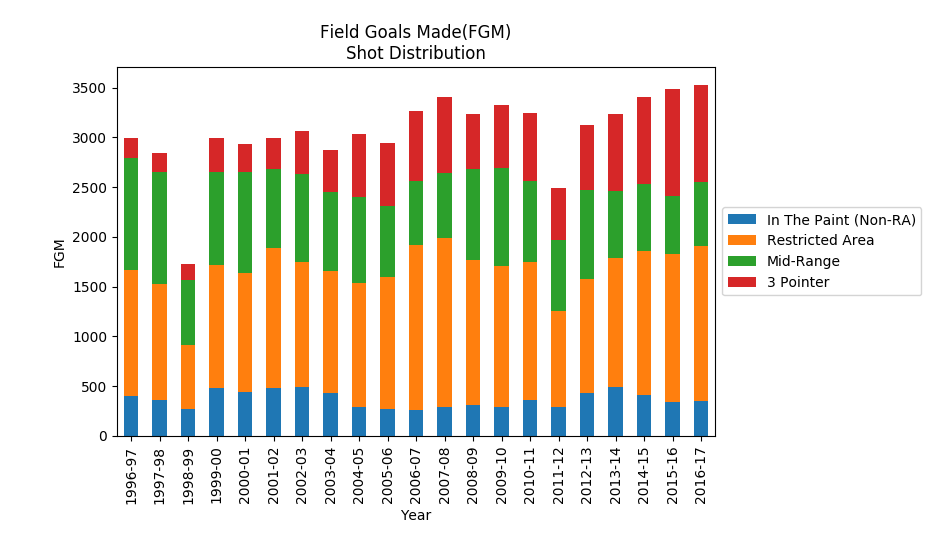

In [236]:
shot_area_all_fgm = final_shot_area_df[['GROUP_VALUE','FGM','Year']]
shot_area_all_fgm_pivot = shot_area_all_fgm.pivot(index='Year', columns='GROUP_VALUE', values='FGM')
shot_area_all_fgm_pivot['3 Pointer'] =  shot_area_all_fgm_pivot[['Above the Break 3', 'Left Corner 3'
                                                                 , 'Right Corner 3']].sum(axis=1)
shot_area_all_fgm_pivot = shot_area_all_fgm_pivot[['In The Paint (Non-RA)','Restricted Area','Mid-Range','3 Pointer',]]

ax = shot_area_all_fgm_pivot.plot.bar(stacked=True)
plt.ylabel('FGM')
plt.xlabel('Year')
plt.title('Field Goals Made(FGM)\nShot Distribution')
plt.tight_layout()

# Shrink current axis by 25% to allocate the 25% to the legend outside of the bar plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


As suspected the highest number of FGM goes to the Restricted Area. It makes sense that the closest shots to the basetk will yield the highest number of made shots. It would be ridiculous if we saw the same ratio of 3 point to Restricted Area shots from the FGA chart. However just keep in mind though that the number of 3 Point Shot attempts from 2012 and onward have increased along with the number of 3 point shots made over the same year interval.

In conclusion, yes the number of mid-range shot attempts have significantly reduced from 1996 to 2017 while the number of 3 point shooting attempts have increased steadily. An important distinction to make though is that although the number of mid-range shots have plumetted, the efficiency of those shots are at an all time high for the Warriors. Another distinction to make is that the Warriors have simply reallocated their shot selections to focus their shot attempts mostly on extremely close shots i.e. the Restricted Area or extremely long shots i.e. the 3 point shot. Anything in between those 2 areas are minimized but highly efficient. While it is simple to say that the Warriors have reallocated their shot selection, making that gamble to promote such a unheard of shot distribution is a big risk most organizations would not have been willing to take. If it was that easy then most teams would have done this decades ago.

Is the mid-range game dead? I think that the mid-range game is where it should be for the Warriors, not heavily prioritized but if need be they are able to use it efficiently to remind other teams that they're not a one trick pony and that th

The question remains though is whether the mid-range game can ever reclaim its high utilization rate like it was back in the 1990's? Can there be an offensive strategy or team composition that can incorporate this?
